In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np

In [2]:
df = pd.read_csv('/content/Salary_Data.csv')
df1 = pd.read_csv('/content/delivery_time.csv')


In [3]:
df1

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [6]:
## used log transformation on the data
df = np.log(df)

In [7]:
df.head()

,YearsExperience,Salary
0,0.095310,10.580073
1,0.262364,10.740843
2,0.405465,10.538237
3,0.693147,10.681091
4,0.788457,10.593906


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [9]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.951428
Salary,0.951428,1.000000


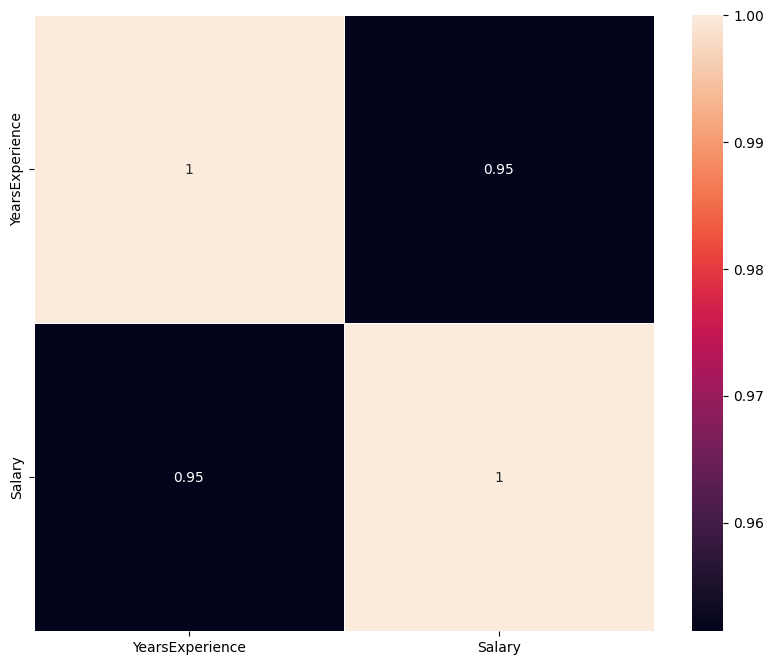

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, linewidths=.5, ax=ax)
plt.show()


In [11]:
df_sorted_asc = df.sort_values(by='YearsExperience', ascending=True)

In [12]:
from sklearn.metrics import r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_sorted_asc[['YearsExperience']], df_sorted_asc['Salary'], test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the R-squared value
r2 = r2_score(y_test, y_pred)

print("R-squared:", r2)


R-squared: 0.871541809683478


In [13]:
df_sorted_asc

,YearsExperience,Salary
0,0.095310,10.580073
1,0.262364,10.740843
2,0.405465,10.538237
3,0.693147,10.681091
4,0.788457,10.593906
5,1.064711,10.944506
6,1.098612,11.004597
7,1.163151,10.904946
8,1.163151,11.073567
9,1.308333,10.954117


<ipython-input-14-6e73e09b663d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_sorted_asc['YearsExperience'])   ## positive skewness is there


<Axes: xlabel='YearsExperience', ylabel='Density'>

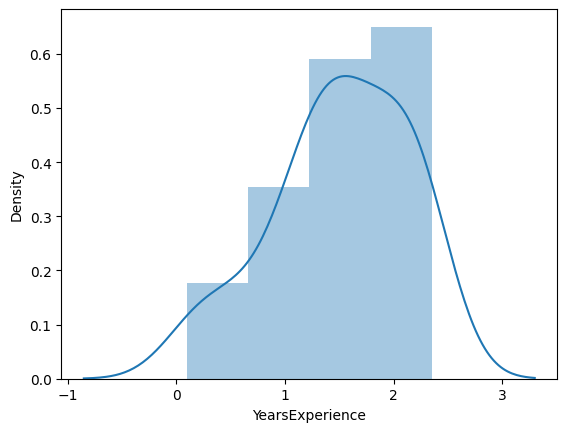

In [14]:
## see the data distribution(density od data points)
import seaborn as sns
sns.distplot(df_sorted_asc['YearsExperience'])   ## positive skewness is there

<ipython-input-12-562444be9ed5>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_sorted_asc['Salary'])


<Axes: xlabel='Salary', ylabel='Density'>

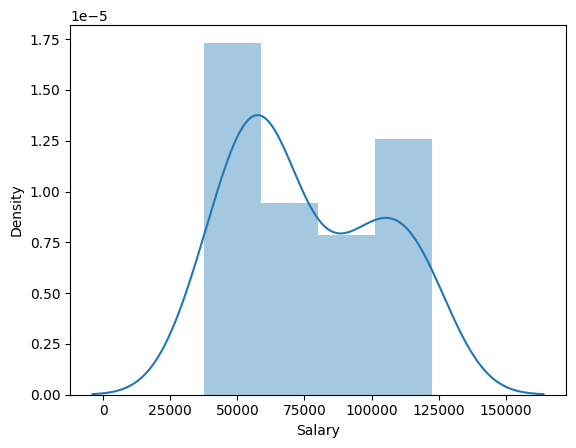

In [ ]:
import seaborn as sns
sns.distplot(df_sorted_asc['Salary'])

In [ ]:
## model building

In [15]:
## i am using old-(ordinaery least squares method) - [import statsmodels.formula.api as smf]
import statsmodels.formula.api as smf
model = smf.ols("Salary~YearsExperience", data=df_sorted_asc).fit()   ## to fit the model--its calculated B0 and B1 values in backend

In [16]:
## to get the B0 nad B1 values we have to use 'model.params'
model.params
## intercept is y value
## and yearsofexp = is slope of the line

Intercept          10.328043
YearsExperience     0.562089
dtype: float64

In [17]:
(model.rsquared, model.rsquared_adj)

(0.905215072581715, 0.9018298966024905)

<Axes: xlabel='YearsExperience', ylabel='Salary'>

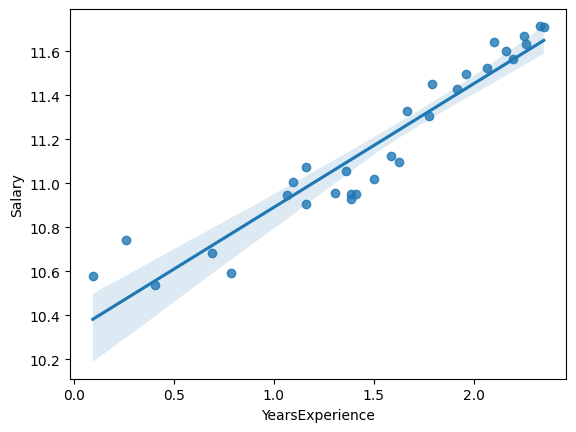

In [18]:
## plot regression plot between salary and yexp
sns.regplot(x="YearsExperience", y='Salary', data = df_sorted_asc)
## 95% data in shaded area

In [19]:
## calculate p and t values
print(model.tvalues, '\n', model.pvalues)
## t-value = 11.34(B0) p-value=5.5119(B1)   ## B1 is slope
###  IF WE GET B0 = 0 VALUE IS ZERO then its horizontal value


Intercept          184.867959
YearsExperience     16.352542
dtype: float64 
 Intercept          9.073132e-45
YearsExperience    7.395278e-16
dtype: float64


In [20]:
## for predction add new data
newdata=pd.Series([12,15])

In [21]:
data_pred = pd.DataFrame(newdata, columns=['YearsExperience'])

In [22]:
data_pred

,YearsExperience
0,12
1,15


In [23]:
model.predict(data_pred)

0    17.073109
1    18.759376
dtype: float64

## Assign - Delivery Time

In [ ]:
##  Q-2 "Delivery_time"

In [53]:
df1.head()

,Delivery Time,Sorting Time
0,3.044522,2.302585
1,2.602690,1.386294
2,2.983153,1.791759
3,3.178054,2.197225
4,3.367296,2.302585


In [54]:
df1_sorted_asc = df1.sort_values(by='Sorting Time', ascending=True)
df1_sorted_asc

,Delivery Time,Sorting Time
18,2.079442,0.693147
7,2.251292,1.098612
13,2.442347,1.098612
14,2.487404,1.098612
1,2.602690,1.386294
15,2.700018,1.386294
11,2.374906,1.386294
20,3.068053,1.609438
2,2.983153,1.791759
5,2.731115,1.791759


In [55]:
## used log transformation on the data
df1 = np.log(df1)

In [56]:
df1

,Delivery Time,Sorting Time
0,1.113344,0.834032
1,0.956545,0.326634
2,1.092981,0.583198
3,1.156269,0.787195
4,1.214110,0.834032
5,1.004710,0.583198
6,1.079918,0.665730
7,0.811504,0.094048
8,1.059456,0.834032
9,1.075410,0.787195


In [57]:
from sklearn.metrics import r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df1_sorted_asc[['Delivery Time']], df1_sorted_asc['Sorting Time'], test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the R-squared value
r2 = r2_score(y_test, y_pred)

print("R-squared:", r2)

R-squared: 0.9068213574479764


In [58]:
df1_sorted_asc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 18 to 0
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     float64
dtypes: float64(2)
memory usage: 504.0 bytes


In [59]:
## trying to make correlation
df1_sorted_asc.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.878727
Sorting Time,0.878727,1.000000


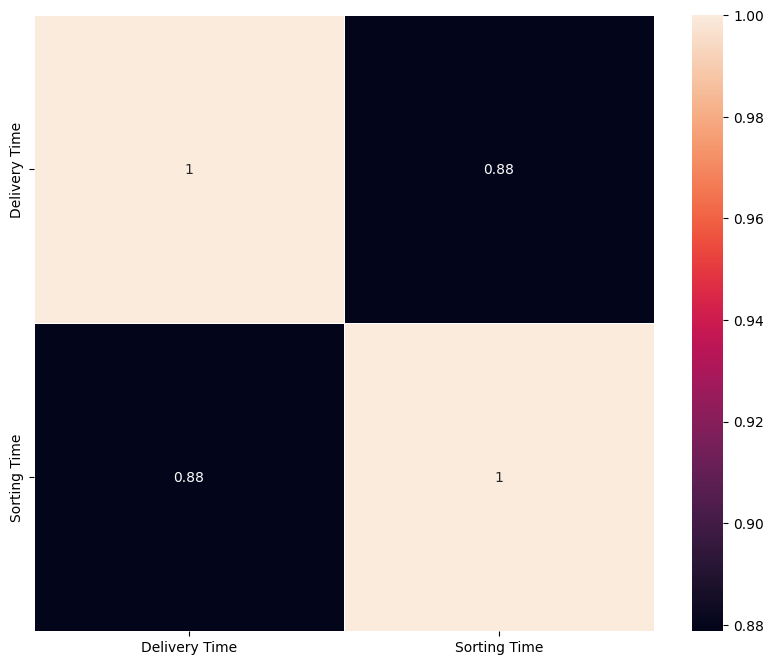

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(df1_sorted_asc.corr(), annot=True, linewidths=.5, ax=ax)
plt.show()

<ipython-input-61-b52b2a1f963f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1_sorted_asc['Delivery Time'])


<Axes: xlabel='Delivery Time', ylabel='Density'>

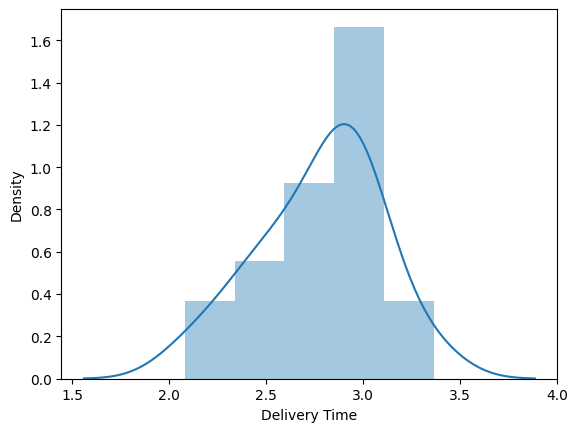

In [61]:
import seaborn as sns
sns.distplot(df1_sorted_asc['Delivery Time'])

In [62]:
df1_sorted_asc.rename(columns={"Sorting Time": "Sorting_Time"}, inplace=True)

In [63]:
df1_sorted_asc.rename(columns={"Delivery Time": "Delivery_Time"}, inplace=True)

In [64]:
df1_sorted_asc.head(2)

,Delivery_Time,Sorting_Time
18,2.079442,0.693147
7,2.251292,1.098612


In [78]:
import statsmodels.formula.api as smf
model2 = smf.ols("Delivery_Time~Sorting_Time", data=df1_sorted_asc).fit()

In [79]:
df1_sorted_asc

,Delivery_Time,Sorting_Time
18,2.079442,0.693147
7,2.251292,1.098612
13,2.442347,1.098612
14,2.487404,1.098612
1,2.602690,1.386294
15,2.700018,1.386294
11,2.374906,1.386294
20,3.068053,1.609438
2,2.983153,1.791759
5,2.731115,1.791759


In [80]:
model2.params

Intercept       1.741987
Sorting_Time    0.597522
dtype: float64

In [81]:
(model2.rsquared, model2.rsquared_adj)

(0.7721613492687401, 0.760169841335516)

<Axes: xlabel='Delivery_Time', ylabel='Sorting_Time'>

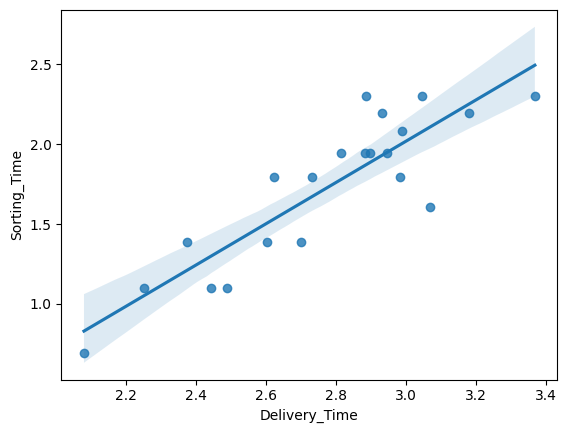

In [83]:
sns.regplot(x="Delivery_Time", y='Sorting_Time', data =df1_sorted_asc)

In [84]:
print(model2.tvalues, '\n', model2.pvalues)

Intercept       13.085552
Sorting_Time     8.024484
dtype: float64 
 Intercept       5.921137e-11
Sorting_Time    1.601539e-07
dtype: float64


In [90]:
## for predction add new data
newdata2=pd.Series([12,15])
newdata2

0    12
1    15
dtype: int64

In [91]:
data_pred2 = pd.DataFrame(newdata2, columns=['Sorting_Time'])
data_pred2

,Sorting_Time
0,12
1,15


In [92]:
model2.predict(data_pred2)
## if we took 15 min to sort the thongs the product maybe big in size so we will need 31 min to deliver approx

0     8.912255
1    10.704822
dtype: float64